<a href="https://colab.research.google.com/github/Abeltemi/CV-Generator/blob/main/Cybalbully.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.utils import resample
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import pickle
import time

In [ ]:
train_data_01 = pd.read_csv('TashDataSets/train_E6oV3lV.csv')
print("Training shape: {}".format(train_data_01.shape))

test_data_01 = pd.read_csv('TashDataSets/test_tweets_anuFYb8.csv')
print("Training shape: {}".format(test_data_01.shape))

Training shape: (31962, 3)
Training shape: (17197, 2)


In [ ]:
train_data_01.info()
train_data_01.head()
train_data_01.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Index(['id', 'label', 'tweet'], dtype='object')

# Loading Dataset 2....

In [ ]:
df = pd.read_csv('TashDataSets/toxicity_parsed_dataset.csv')
df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.90,0.10,0
1,1,` :Clarification for you (and Zundark's righ...,1.00,0.00,0
2,2,Elected or Electoral? JHK,1.00,0.00,0
3,3,`This is such a fun entry. Devotchka I once...,1.00,0.00,0
4,4,Please relate the ozone hole to increases in c...,0.80,0.20,0


# Selecting only useful columns of Dataset2

In [ ]:
df = df[['index', 'oh_label', 'Text']]
df.head()

,index,oh_label,Text
0,0,0,This: :One can make an analogy in mathematical...
1,1,0,` :Clarification for you (and Zundark's righ...
2,2,0,Elected or Electoral? JHK
3,3,0,`This is such a fun entry. Devotchka I once...
4,4,0,Please relate the ozone hole to increases in c...


In [ ]:
df.columns

Index(['index', 'oh_label', 'Text'], dtype='object')

In [ ]:
df.rename(columns = {
    'index': 'id',
    'oh_label': 'label',
    'Text': 'tweet'
}, inplace = True)

In [ ]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

# Splitting the Dataset into Train and Test dataset

In [ ]:
train_data_02, test_data_02 = train_test_split(df, test_size=0.3, random_state=10, shuffle=True)

train_data_02 = train_data_02[['id', 'label', 'tweet']]
test_data_02 = test_data_02[['id', 'tweet']]

train_data_02.head()

,id,label,tweet
69140,69140,0,", 30 July 2008 (UTC) *: *double-checks your us..."
157499,157499,0,born 31march 1995 Yes
83922,83922,0,dated prod|concern = confirmed sockpuppet] of ...
30953,30953,0,Where is that documented? It's certainly not...
150734,150734,0,`:Perfectly fine - we'll appreciate your contr...


In [ ]:
# Merging two Train Data Sets
train_data = pd.concat([train_data_01, train_data_02], ignore_index=True)
train_data.shape

(143742, 3)

In [ ]:
train_data['label'].value_counts()

0    130760
1     12982
Name: label, dtype: int64

In [ ]:
# Merging two Test Data Sets
test_data = pd.concat([test_data_01, test_data_02], ignore_index=True)
test_data.shape

(65103, 2)

In [ ]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

test_data_clean = clean_text(test_data, "tweet")
train_data_clean = clean_text(train_data, "tweet")

train_majority = train_data_clean[train_data_clean.label == 0]
train_minority = train_data_clean[train_data_clean.label == 1]
train_minority_upsampled = resample(
    train_minority,
    replace=True,
    n_samples=len(train_majority),
    random_state=123
)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    130760
0    130760
Name: label, dtype: int64

In [ ]:
train_upsampled

,id,label,tweet
45884,100705,1,hey retard you dont get it those two put ...
129712,154121,1,the graceful slick is non other than an ungra...
19492,19493,1,you might be a libtard if libtard sjw libera...
135847,135711,1,controversial remarks alleged calling faceb...
62372,108421,1,go screw contrary to your recent message ...
...,...,...,...
143736,141273,0,section 1b of the gacr states it complies wi...
143737,9372,0,say tim could you take a look at the e...
143739,93553,0,ahcene bendjazia well dont get me started the...
143740,94735,0,no i dont think you mean to be obnoxious i th...


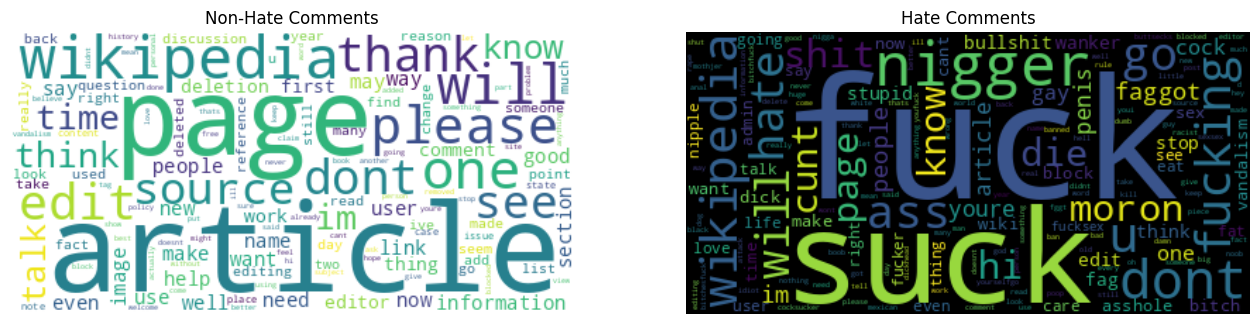

In [ ]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_data_clean['tweet'][train_data.label == 0])
text_neg = " ".join(train_data_clean['tweet'][train_data.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

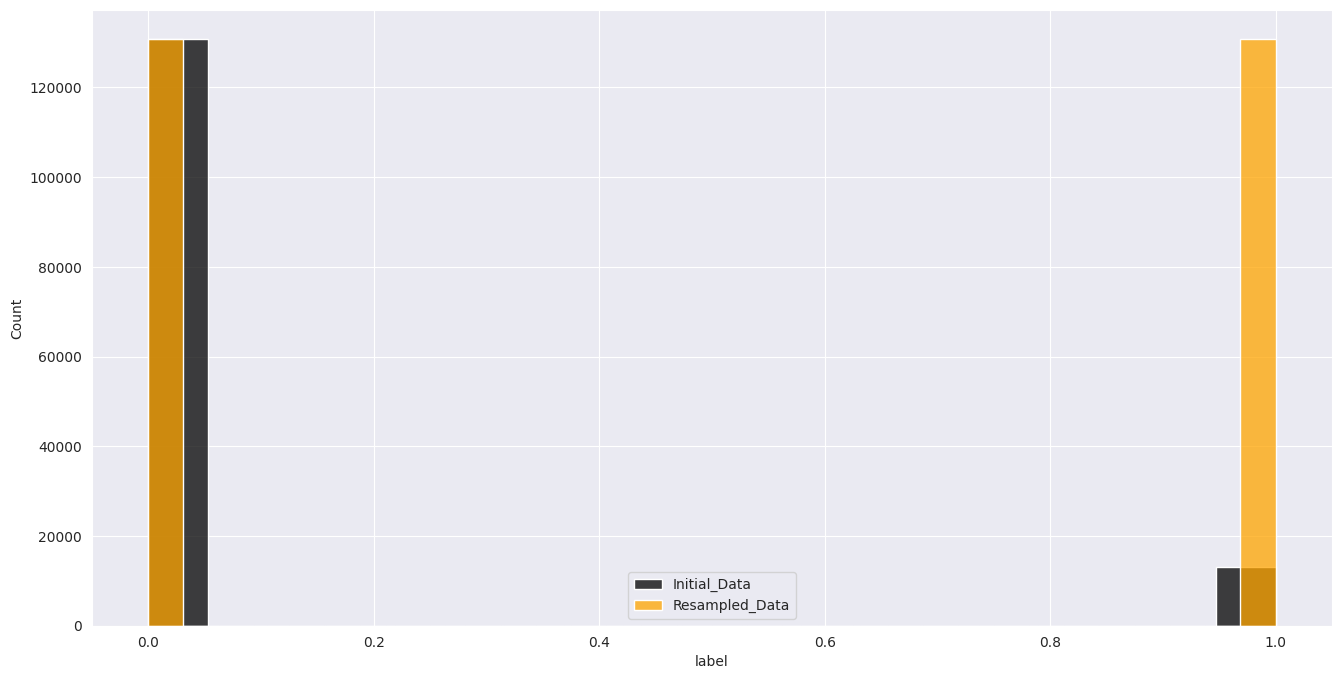

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(data = train_data['label'], color='black', legend=True)
sns.histplot(data = train_upsampled['label'], color = 'orange', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

--------------After Upsampling the Minority Class---------------


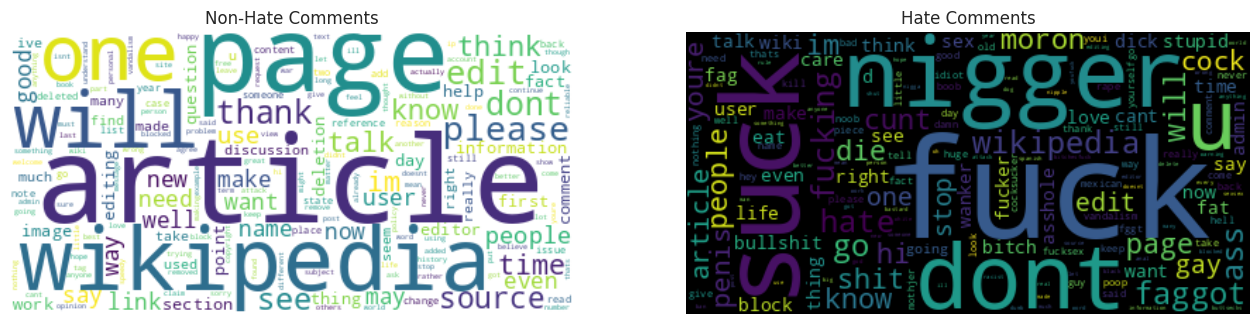

In [ ]:
print('--------------After Upsampling the Minority Class---------------')

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][train_data.label == 0])
text_neg = " ".join(train_upsampled['tweet'][train_data.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [ ]:
data_transformed = train_upsampled[['label', 'tweet']]
y = data_transformed.iloc[:, :-1].values

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
print(y.shape)

(261520, 2)


In [ ]:
y_to_df = pd.DataFrame(y)
y_hate = np.array(y_to_df[0])
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# cv = CountVectorizer(max_features = 2000)
# x = cv.fit_transform(train_upsampled['tweet']).toarray()
# x

In [ ]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_features = 2000)
# type(trainData.tweet)
x = vect.fit_transform(train_upsampled.tweet).toarray()

In [ ]:
vect = vect.fit(train_upsampled.tweet)

In [ ]:
feature_names = vect.get_feature_names_out()
feature_names[:20]

array(['10', '100', '1px', '1px solid', '20', '2006', '2007', '2008',
       '2009', '3px', 'able', 'able to', 'about', 'about it', 'about the',
       'about this', 'about you', 'above', 'absolutely', 'abuse'],
      dtype=object)

In [ ]:
# x = vect.transform(train_upsampled.tweet)

# Train and Test splitting the  Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size=0.20, random_state=1)

In [ ]:
# logreg = LogisticRegression()
# model = logreg.fit(x_train, y_train)

In [ ]:
classifier = GaussianNB()
model = classifier.fit(x_train, y_train)

In [ ]:
model_file = "Model_NB.pk"
pickle.dump(model, open(model_file, 'wb'))

In [ ]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc * 100)

71.66182318751912


In [ ]:
text = "you are a whole"
test_ = vect.transform([text])
test_.shape

(1, 2000)

In [ ]:
check_pred = model.predict(test_.toarray())
check_pred

array([1.])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# using Naive Bayes classifier
model_nb = GaussianNB()

model_nb.fit(x_train, y_train)

In [ ]:
y_pred = model_nb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Prediction accuracy: {acc:.2f}%")
x_test.shape

In [ ]:
text = "I'm going to kill you"
check = cv.fit_transform([text]).toarray()
pred_check = model_nb.predict(check)

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', '1bfgs','liblinear']}
grid = GridSearchCV(GaussianNB(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print(f"Best parameters: ", grid.best_params_)